## Implementation

The below code fragment implements a `LinearRegression` classifier using a basic Gradient Descent procedure.

## Computing Gradients

We have an MSE loss function $\frac{1}{n} \sum (y - f(x))^2$.

Where function $f(x) = xW + b$.

We now calculate partial derivatives of the loss function with respect to weights and a bias.

Let us first calculate the derivative of one square difference w.r.t. $W$:

\begin{align}
    ((y - f(x))^2)' &= ((y - (xW + b))^2)'\\
                    &= 2 * (y - (xW + b)) * (y - (xW + b))'\\
                    &= 2 * (y - (xW + b)) * (0 - (x + 0))\\
                    &= 2 * (y - (xW + b)) * (-x)\\
                    &= -2x * (y - (xW + b))
\end{align}

Then the total derivative will be $-2 * dot(x.T, y - f(x))\ /\ n$.

Let us now calculate the derivative of one square difference w.r.t. $b$:

\begin{align}
    ((y - f(x))^2)' &= ((y - (xW + b))^2)'\\
                    &= 2 * (y - (xW + b)) * (y - f(xW + b))'\\
                    &= 2 * (y - (xW + b)) * (0 - (0 + 1))\\
                    &= 2 * (y - (xW + b)) * (-x)\\
                    &= -2 * (y - (xW + b))
\end{align}

Then the total derivative will be $-2 * sum(y - f(x))\ /\ n$.

In [1]:
import numpy as np


class LinearRegression:
    def __init__(self, features: np.ndarray, labels: np.ndarray, learning_rate: float = 1e-5, iterations: int = 100, logging: bool = False) -> None:
        """Initializes a Linear Regression model."""

        self.features = features
        self.labels = labels
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.logging = logging

        self.num_samples, num_features = features.shape

        self.weights = np.zeros(num_features, dtype=np.float32)
        self.bias = np.float32(1.0)

    def mse_loss(self, residuals: np.ndarray) -> np.float32:
        """Computes a Mean Squared Error (MSE) loss."""

        return np.mean(np.square(residuals))

    def fit(self) -> None:
        """Fits a Linear Regression model."""

        for _ in range(self.iterations):
            residuals = self.labels - self.predict(self.features)

            d_weights = -2 / self.num_samples * np.dot(self.features.T, residuals)
            d_bias = -2 / self.num_samples * np.sum(residuals)

            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

            if self.logging:
                print(f"MSE Loss: {self.mse_loss(residuals):.3f}")

    def predict(self, features: np.ndarray) -> np.ndarray:
        """Performs an inference on the given features."""

        return np.dot(features, self.weights) + self.bias

## Generate Fake Data

We generate some fake training and test data to approximate function $f(x) = 2x$.

In [2]:
import matplotlib.pyplot as plt


plt.style.use("ggplot")

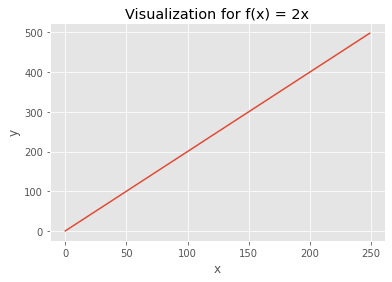

In [3]:
# Training dataset
train_features = np.arange(0, 250).reshape(-1, 1)
train_labels = np.arange(0, 500, 2)

# Testing dataset
test_features = np.arange(300, 400, 8).reshape(-1, 1)
test_labels = np.arange(600, 800, 16)

# Plot the data
plt.title("Visualization for f(x) = 2x")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(train_features, train_labels)
plt.show()

In [4]:
linear_regression = LinearRegression(train_features, train_labels, iterations=75, learning_rate=1e-5, logging=False)
linear_regression.fit()

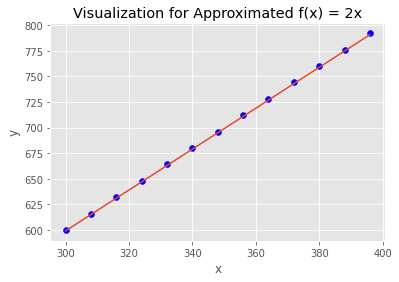

In [5]:
plt.title("Visualization for Approximated f(x) = 2x")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(test_features, test_labels, color="blue")
plt.plot(test_features, linear_regression.predict(test_features))
plt.show()